In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
ecom_df = pd.read_csv("ecommerce-data.csv")
ecom_df

,dateTime,country,city,region,screenRed,surveyType,purposeProductInfo,purposeBuyFromSite,purposeComparePricing,purposeInfoAndResources,...,behavReferral,behavPageviews,behavHomePage,behavDetailProdA,behavDetailProdB,behavDetailProdC,behavAnySolution,behavAnySale,behavCart,behavConversion
0,7/25/2014 14:10,United States,Monroe,LA,1280x1024,At Exit,Products,NaN,NaN,Resources,...,Direct,4 to 6,1,1,0,0,0,0,0,0
1,7/25/2014 15:01,United States,Ambler,PA,1280x800,At Exit,NaN,Buy from this site,Compare pricing,NaN,...,Unbranded Search,1,0,0,0,0,0,0,0,0
2,7/25/2014 15:15,United States,Beaumont,TX,768x1024,At Exit,NaN,NaN,Compare pricing,NaN,...,Unbranded Search,10+,0,0,0,0,1,1,0,0
3,7/25/2014 17:05,United States,Cedar City,UT,1280x960,At Exit,Products,NaN,NaN,NaN,...,Unbranded Search,10+,0,1,1,0,1,0,0,0
4,7/26/2014 0:27,United States,Bullhead City,AZ,1138x640,At Exit,NaN,NaN,NaN,Resources,...,Referred,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,9/11/2014 11:16,United States,Albany,NY,1280x1024,At Arrival and Exit,Products,NaN,Compare pricing,Resources,...,Direct,10+,1,1,1,0,0,0,0,0
1589,9/11/2014 11:18,United States,Grafton,OH,768x1024,At Arrival Only,Products,NaN,NaN,NaN,...,Direct,4 to 6,1,0,0,1,0,0,0,0
1590,9/11/2014 11:33,United States,Lansing,MI,1680x1050,At Arrival and Exit,Products,NaN,NaN,NaN,...,Unbranded Search,10+,1,0,0,0,1,0,0,0
1591,9/11/2014 11:42,United States,Saint Charles,MO,1366x768,At Arrival and Exit,NaN,NaN,NaN,Resources,...,Direct,4 to 6,0,0,1,0,0,0,0,0


In [3]:
ecom_df['behavNumVisits'].value_counts()

behavNumVisits
1      1121
2       256
3        99
4        40
5        31
6        15
7        11
9         6
11        2
13        2
8         2
20        2
55        1
15        1
57        1
10        1
101       1
14        1
Name: count, dtype: int64

(array([16.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.000e+00, 1.130e+02, 2.250e+02, 3.370e+02, 4.490e+02, 5.610e+02,
        6.730e+02, 7.850e+02, 8.970e+02, 1.009e+03, 1.121e+03]),
 <BarContainer object of 10 artists>)

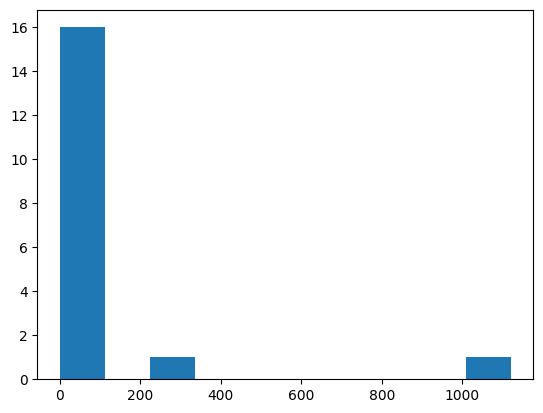

In [4]:
plt.hist(ecom_df["behavNumVisits"].value_counts())

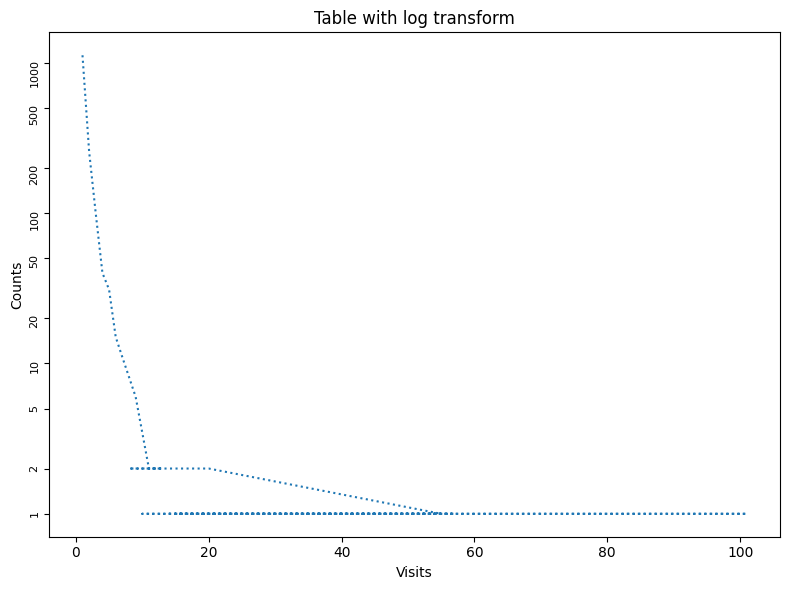

In [10]:
visit_counts = ecom_df['behavNumVisits'].value_counts()

logbreaks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Plot the log-transformed visit counts
plt.figure(figsize=(8, 6))
plt.plot(np.log(visit_counts), linestyle='dotted')
plt.title("Table with log transform")
plt.xlabel("Visits")
plt.ylabel("Counts")

plt.yticks(np.log(logbreaks), logbreaks, rotation=90)
plt.gca().tick_params(axis='y', which='major', labelsize=8)
plt.tight_layout()
plt.show()

(array([256., 256.,   0.,   0., 301.,   0.,   0., 199.,   0., 581.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

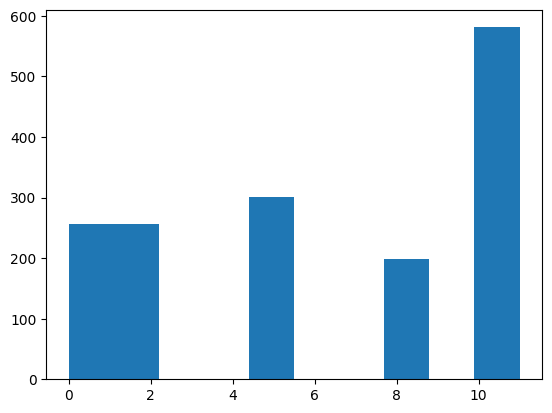

In [12]:
pageViewInt = ecom_df['behavPageviews'].copy()

# Replace the values in the 'pageViewInt' Series
pageViewInt[ecom_df['behavPageviews'] == "4 to 6"] = 5
pageViewInt[ecom_df['behavPageviews'] == "1"] = 1
pageViewInt[ecom_df['behavPageviews'] == "10+"] = 11
pageViewInt[ecom_df['behavPageviews'] == "7 to 9"] = 8
pageViewInt[ecom_df['behavPageviews'] == "2 to 3"] = 2
pageViewInt[ecom_df['behavPageviews'] == "0"] = 0

plt.hist(pageViewInt)

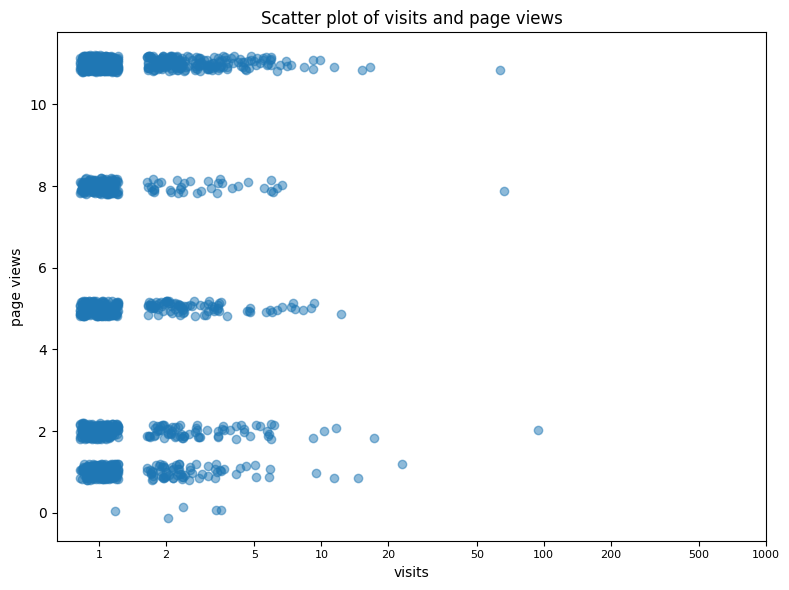

In [14]:
ecom_df["pageViewInt"] = pageViewInt

# Create the scatter plot with jittered data
plt.figure(figsize=(8, 6))
plt.scatter(x=np.log(ecom_df['behavNumVisits']) + np.random.uniform(-0.2, 0.2, len(ecom_df)), 
            y=ecom_df['pageViewInt'] + np.random.uniform(-0.2, 0.2, len(ecom_df)),
            alpha=0.5)
plt.title("Scatter plot of visits and page views")
plt.xlabel("visits")
plt.ylabel("page views")

# Set the x-axis ticks and labels
plt.xticks(np.log(logbreaks), logbreaks)
plt.gca().tick_params(axis='x', which='major', labelsize=8)

plt.tight_layout()
plt.show()


In [19]:
print(f"Correlation without log: {ecom_df['behavNumVisits'].corr(ecom_df['pageViewInt'])}\nCorrelation with log: {ecom_df['behavNumVisits'].apply(np.log).corr(ecom_df['pageViewInt'])}")

Correlation without log: 0.003575421879365342
Correlation with log: 0.037645280919496954


In [21]:
salaries_df = pd.read_csv("Salaries.csv")
print(salaries_df.head())

       rank discipline  yrs.since.phd  yrs.service   sex  salary
0      Prof          B             19           18  Male  139750
1      Prof          B             20           16  Male  173200
2  AsstProf          B              4            3  Male   79750
3      Prof          B             45           39  Male  115000
4      Prof          B             40           41  Male  141500


In [ ]:
import seaborn as sns

# Create a pairplot
sns.pairplot(salaries_df, vars=["rank", "discipline", "yrs.since.phd", "yrs.service", "sex", "salary"])
plt.show()


In [ ]:
# Create a scatter plot matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="rank", y="salary", data=salaries_df, ax=ax)
sns.scatterplot(x="discipline", y="salary", data=salaries_df, ax=ax)
sns.scatterplot(x="yrs.since.phd", y="salary", data=salaries_df, ax=ax)
sns.scatterplot(x="yrs.service", y="salary", data=salaries_df, ax=ax)
sns.scatterplot(x="sex", y="salary", data=salaries_df, ax=ax)
plt.show()

In [27]:
selected_cols = ['yrs.since.phd','yrs.service', 'salary']
corr_matrix = salaries_df[selected_cols].corr(method='pearson')

print(corr_matrix)

               yrs.since.phd  yrs.service    salary
yrs.since.phd       1.000000     0.909649  0.419231
yrs.service         0.909649     1.000000  0.334745
salary              0.419231     0.334745  1.000000
